<a href="https://colab.research.google.com/github/Deriss/Tutoriais-Big-Data/blob/main/Template_Estudo_de_Caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso

O Tennesse Eastman Process (TEP) é um benchmark utilizado na engenharia química para testar esquemas de controle e ferramentas de monitoramento de processos. O TEP simula uma planta de produção de dois produtos líquidos, denominados G e H, a partir de quatro gases reagentes A, C, D e E. O processo apresenta também um gás inerte, B, e um subproduto F. A planta possui quatro equipamentos principais: um reator, um condensador, um separador líquido-vapor, um compressor e um stripper. No reator ocorrem quatro reações exotérmicas e irreversíveis.
Após o reator, os produtos passam pelo condensador e o separador líquido-vapor para separar os gases que não reagiram, os quais são enviados ao compressor para serem alimentados novamente ao reator.  Por outro lado, a fase líquida passa pelo stripper onde os reagentes remanescentes são separados dos produtos. A Figura mostra um esquema do processo. 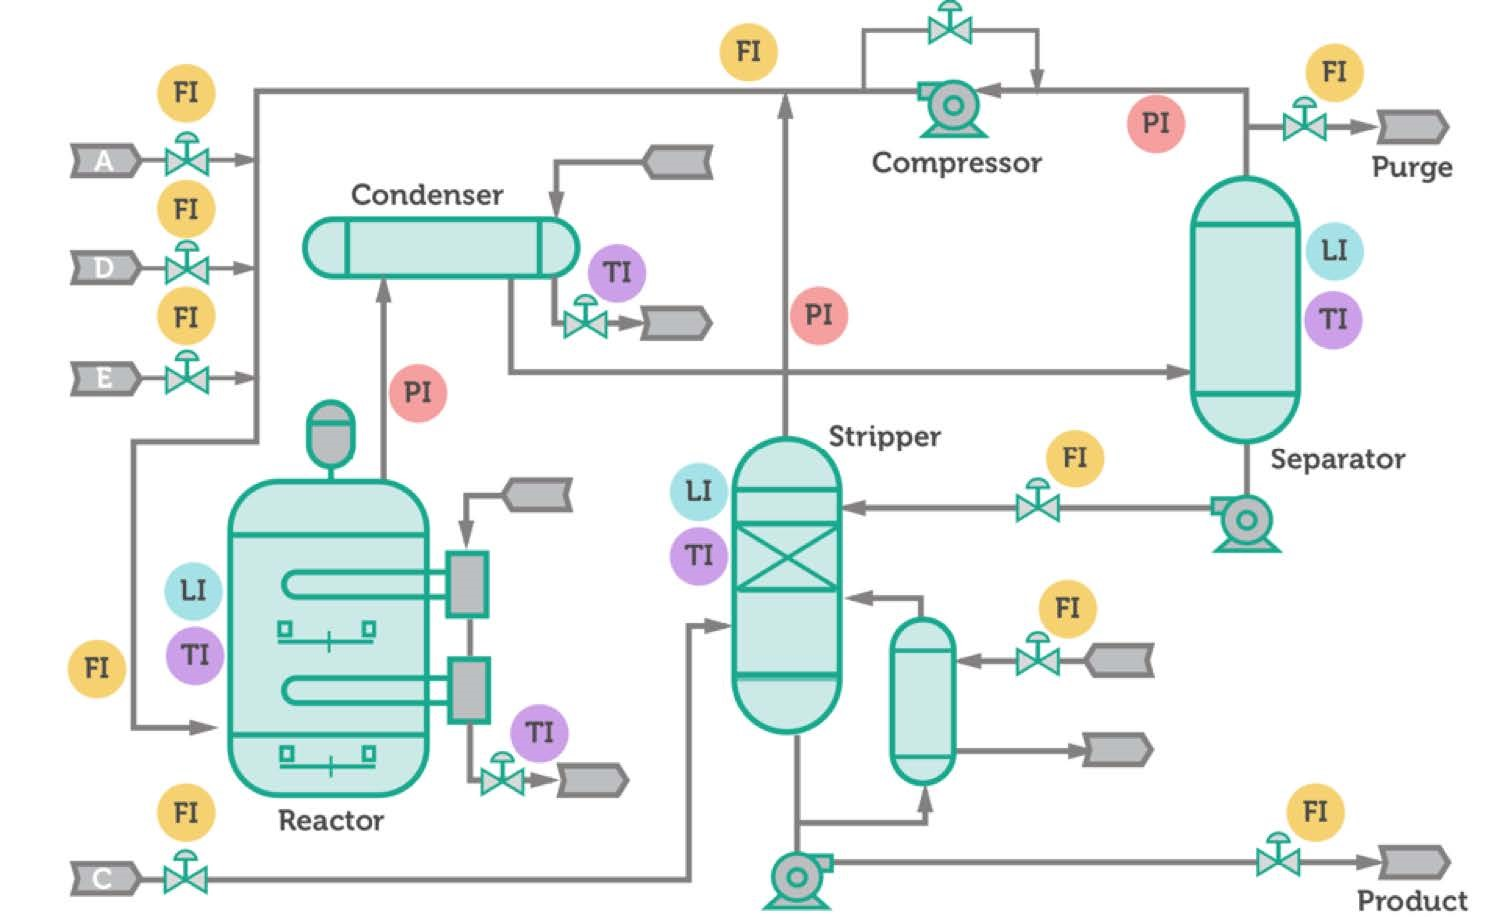

Em 2017, Rieth et al. geraram um extenso conjunto de dados a partir de simulações do TEP, contendo 20 tipos de falhas diferentes. Cada falha foi simulada 500 vezes, gerando um total de 10.000 simulações. Devido ao grande volume de dados gerados, é indicado o uso de ferramentas de Big Data para poder analisar este conjunto de dados. Uma versão desses dados contendo as primeiras 100 simulações para cada falha será utilizada nessa análise. Mais informações sobre o dataset, as variáveis e falhas pode ser encontrada nesse [link](https://deriss.github.io/Tutoriais-Big-Data/TEP/TEP_Dados_Codebook.html).

## Dependencias

Para poder utilizar o PySpark no Google Colab, primeiro precisamos instalar algumas dependencias

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null # java 8
!wget -q http://archive.apache.org/dist/spark/spark-3.3.3/spark-3.3.3-bin-hadoop3.tgz #baixar o spark com Hadoop


In [2]:
!tar xf spark-3.3.3-bin-hadoop3.tgz # extrair os archivos do Spark
!pip install -q findspark # instalar biblioteca para achar o Spark no sistema

In [3]:
# Criando as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.3-bin-hadoop3"

# Baixar dados Tennesse Eastman Process

In [4]:
!wget -q https://github.com/Deriss/TEP-Data/raw/main/faulty_data.csv
!wget -q https://github.com/Deriss/TEP-Data/raw/main/fault_free_training.csv

# Inicializar o PySpark

Para testar o PySpark criaremos uma sesão local

In [ ]:
# iniciando uma sessão local
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()  # O  * em local[*] indica que vamos utilizar todas as unidades de processamento disponíveis
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

# Inicie a sua análise aqui

In [ ]:
# Carregar os datasets

